- 목표 : Kaggle Boston Housing Dataset을 데이터 전처리

- 사용 多 데이터 : CMEDV, RM, TAX




In [4]:
import pandas as pd
import numpy as np

#step0 데이터 불러오기 및 확인

In [6]:
# 데이터 불러오기
src_path = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python_da/kaggle_boston_price.csv'

# 만약 한글이 포함되면 encoding ='CP949'를 넣어줘야 한다.
df = pd.read_csv(src_path, sep=',')

In [7]:
df.head(5)

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


#step1 결측값확인

In [10]:
# 각 칼럼별 결측치 확인
df.isnull().sum()

,0
TOWN,0
LON,0
LAT,0
CMEDV,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0


#step2 표본 추출

##1. simple random sampling

In [11]:
# replace = True(복원추출) <-> False(비복원추출)
sampling_results_df=df.sample(n=10, replace=False, random_state=47)

In [13]:
sampling_results_df

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
355,Pembroke,-70.8525,42.0300,20.6,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57
57,Wenham,-70.9295,42.3715,31.6,0.01432,100.0,1.32,0,0.411,6.816,40.5,8.3248,5,256,15.1,392.90,3.95
165,Cambridge,-71.0820,42.2295,25.0,2.92400,0.0,19.58,0,0.605,6.101,93.0,2.2834,5,403,14.7,240.16,9.81
39,Lynnfield,-71.0130,42.3130,30.8,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32
243,Natick,-71.2320,42.1725,23.7,0.12757,30.0,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19
132,Somerville,-71.0745,42.2405,23.0,0.59005,0.0,21.89,0,0.624,6.372,97.9,2.3274,4,437,21.2,385.76,11.12
453,Boston Savin Hill,-71.0400,42.1770,17.8,8.24809,0.0,18.10,0,0.713,7.393,99.3,2.4527,24,666,20.2,375.87,16.74
266,Brookline,-71.0725,42.1965,30.7,0.78570,20.0,3.97,0,0.647,7.014,84.6,2.1329,5,264,13.0,384.07,14.79
157,Cambridge,-71.0690,42.2285,41.3,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403,14.7,363.43,4.59
480,Boston West Roxbury,-71.1008,42.1740,23.0,5.82401,0.0,18.10,0,0.532,6.242,64.7,3.4242,24,666,20.2,396.90,10.74


##2. uniform sampling

칼럼 중 RAD 데이터를 이용해 uniform sampling을 할 것이다.

In [14]:
# max 구하기
df['RAD'].max()

24

In [15]:
# min 구하기
df['RAD'].min()

1

In [17]:
# sampling 전, RAD value값마다 데이터 건수 알아보기
df['RAD'].value_counts()

,count
RAD,
24,132
5,115
4,110
3,38
6,26
2,24
8,24
1,20
7,17


In [35]:
print(df.groupby('RAD', group_keys=False).apply(lambda x: x.sample(2),include_groups=False))

                  TOWN      LON      LAT  CMEDV     CRIM    ZN  INDUS  CHAS  \
255            Ashland -71.2690  42.1482   20.9  0.03548  80.0   3.64     0   
331           Holbrook -71.0115  42.0865   17.1  0.05023  35.0   6.06     0   
90             Melrose -71.0300  42.2720   22.6  0.04684   0.0   3.41     0   
89             Melrose -71.0345  42.2785   28.7  0.05302   0.0   3.41     0   
49             Peabody -70.9525  42.3208   19.4  0.21977   0.0   6.91     0   
3           Marblehead -70.9280  42.2930   33.4  0.03237   0.0   2.18     0   
27                Lynn -70.9597  42.2825   14.8  0.95577   0.0   8.14     0   
93            Stoneham -71.0620  42.2960   25.0  0.02875  28.0  15.04     0   
150          Cambridge -71.0620  42.2236   21.5  1.65660   0.0  19.58     0   
77              Woburn -71.0760  42.2895   20.8  0.08707   0.0  12.83     0   
497             Revere -70.9947  42.2496   18.3  0.26838   0.0   9.69     0   
500             Revere -70.9920  42.2380   16.8  0.2

##3. 층화추출

In [38]:
# 층화추출을 위해 RAD의 그룹별 데이터 비율 알아보기
total = len(df)
MAX = df['RAD'].max() + 1

for i in range(MAX):
    print(f'RAD 지수 : {i}, 비율 {len(df.loc[df["RAD"] == i]) / total}')

RAD 지수 : 0, 비율 0.0
RAD 지수 : 1, 비율 0.039525691699604744
RAD 지수 : 2, 비율 0.04743083003952569
RAD 지수 : 3, 비율 0.07509881422924901
RAD 지수 : 4, 비율 0.21739130434782608
RAD 지수 : 5, 비율 0.22727272727272727
RAD 지수 : 6, 비율 0.05138339920948617
RAD 지수 : 7, 비율 0.03359683794466403
RAD 지수 : 8, 비율 0.04743083003952569
RAD 지수 : 9, 비율 0.0
RAD 지수 : 10, 비율 0.0
RAD 지수 : 11, 비율 0.0
RAD 지수 : 12, 비율 0.0
RAD 지수 : 13, 비율 0.0
RAD 지수 : 14, 비율 0.0
RAD 지수 : 15, 비율 0.0
RAD 지수 : 16, 비율 0.0
RAD 지수 : 17, 비율 0.0
RAD 지수 : 18, 비율 0.0
RAD 지수 : 19, 비율 0.0
RAD 지수 : 20, 비율 0.0
RAD 지수 : 21, 비율 0.0
RAD 지수 : 22, 비율 0.0
RAD 지수 : 23, 비율 0.0
RAD 지수 : 24, 비율 0.2608695652173913


In [51]:
# 층화 추출, np.rint는 반올림을 하지만 float로 반환함. 이를 방지하기 위해 int 사용
N = 10
stratified_sample = df.groupby('RAD').apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df)))),include_groups=False)

In [52]:
# drop = True 기존의 인덱스를 제거, False 기존의 인덱스를 새로운 칼럼으로
stratified_sample = stratified_sample.reset_index(drop=True)
print(stratified_sample)

                  TOWN      LON      LAT  CMEDV      CRIM    ZN  INDUS  CHAS  \
0               Dedham -71.0940  42.1355   25.2   0.16211  20.0   6.96     0   
1                 Lynn -70.9880  42.2776   18.2   0.72580   0.0   8.14     0   
2              Norwood -71.1090  42.1100   23.9   0.08265   0.0  13.92     0   
3            Cambridge -71.0670  42.2245   24.3   1.34284   0.0  19.58     0   
4            Cambridge -71.0792  42.2390   19.1   2.31390   0.0  19.58     0   
5               Revere -70.9947  42.2496   18.3   0.26838   0.0   9.69     0   
6  Boston South Boston -71.0320  42.2057    5.0  67.92080   0.0  18.10     0   
7   Boston Charlestown -71.0380  42.2265   13.3   9.82349   0.0  18.10     0   
8       Boston Roxbury -71.0558  42.1937   10.2  12.24720   0.0  18.10     0   

     NOX     RM    AGE     DIS  TAX  PTRATIO       B  LSTAT  
0  0.464  6.240   16.3  4.4290  223     18.6  396.90   6.59  
1  0.538  5.727   69.5  3.7965  307     21.0  390.95  11.28  
2  0.437  6.1

##조건추출

In [58]:
condition_df1 = df.loc[df['NOX']<=0.5]
print(condition_df1.head(5))

         TOWN      LON      LAT  CMEDV     CRIM   ZN  INDUS  CHAS    NOX  \
1  Swampscott -70.9500  42.2875   21.6  0.02731  0.0   7.07     0  0.469   
2  Swampscott -70.9360  42.2830   34.7  0.02729  0.0   7.07     0  0.469   
3  Marblehead -70.9280  42.2930   33.4  0.03237  0.0   2.18     0  0.458   
4  Marblehead -70.9220  42.2980   36.2  0.06905  0.0   2.18     0  0.458   
5  Marblehead -70.9165  42.3040   28.7  0.02985  0.0   2.18     0  0.458   

      RM   AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT  
1  6.421  78.9  4.9671    2  242     17.8  396.90   9.14  
2  7.185  61.1  4.9671    2  242     17.8  392.83   4.03  
3  6.998  45.8  6.0622    3  222     18.7  394.63   2.94  
4  7.147  54.2  6.0622    3  222     18.7  396.90   5.33  
5  6.430  58.7  6.0622    3  222     18.7  394.12   5.21  


In [59]:
condition_df2 = df.loc[(df['NOX']<=0.5) & (df['RAD']<=4)]
print(condition_df2.head(5))

         TOWN      LON      LAT  CMEDV     CRIM   ZN  INDUS  CHAS    NOX  \
1  Swampscott -70.9500  42.2875   21.6  0.02731  0.0   7.07     0  0.469   
2  Swampscott -70.9360  42.2830   34.7  0.02729  0.0   7.07     0  0.469   
3  Marblehead -70.9280  42.2930   33.4  0.03237  0.0   2.18     0  0.458   
4  Marblehead -70.9220  42.2980   36.2  0.06905  0.0   2.18     0  0.458   
5  Marblehead -70.9165  42.3040   28.7  0.02985  0.0   2.18     0  0.458   

      RM   AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT  
1  6.421  78.9  4.9671    2  242     17.8  396.90   9.14  
2  7.185  61.1  4.9671    2  242     17.8  392.83   4.03  
3  6.998  45.8  6.0622    3  222     18.7  394.63   2.94  
4  7.147  54.2  6.0622    3  222     18.7  396.90   5.33  
5  6.430  58.7  6.0622    3  222     18.7  394.12   5.21  


#step3 데이터 분리 하고 다시 합치기

TAX 중앙값을 기준으로 나누고 다시 합치기

In [60]:
low_tax_df = df.loc[df['TAX'] <= df['TAX'].median()]
high_tax_df = df.loc[df['TAX']>df['TAX'].median()]

In [63]:
join_df = pd.concat([low_tax_df, high_tax_df],ignore_index=True)

In [65]:
join_df

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Revere,-71.0010,42.2525,19.7,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14
502,Revere,-70.9947,42.2496,18.3,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10
503,Revere,-71.0050,42.2455,21.2,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92
504,Revere,-70.9985,42.2430,17.5,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10


좌우로 병합하기(중복있으면 그냥 merge 쓰자^^;;)

In [79]:
df1 = df.loc[:3, 'TOWN':'LAT']
df2 = df.loc[:3, ['LON', 'LAT', 'CMEDV']]

merge_df = df1.merge(df2)

In [80]:
print(df1)
print(df2)

         TOWN     LON      LAT
0      Nahant -70.955  42.2550
1  Swampscott -70.950  42.2875
2  Swampscott -70.936  42.2830
3  Marblehead -70.928  42.2930
      LON      LAT  CMEDV
0 -70.955  42.2550   24.0
1 -70.950  42.2875   21.6
2 -70.936  42.2830   34.7
3 -70.928  42.2930   33.4


In [81]:
merge_df

,TOWN,LON,LAT,CMEDV
0,Nahant,-70.955,42.2550,24.0
1,Swampscott,-70.950,42.2875,21.6
2,Swampscott,-70.936,42.2830,34.7
3,Marblehead,-70.928,42.2930,33.4


#Step4 파생변수 생성(= 새로운 칼럼 제작)

##척도변환

연속형->범주형

In [82]:
df.head(5)

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [83]:
MAX_TAX = df['TAX'].max()
MIN_TAX = df['TAX'].min()

TAX_RANGE = MAX_TAX - MIN_TAX

interval = TAX_RANGE/3

In [84]:
df['TAX_GRADE'] = np.where(df['TAX']>=(MAX_TAX-interval),'B', np.where(df['TAX']>=(MIN_TAX+interval),'M','L'))

In [86]:
df

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAX_GRADE
0,Nahant,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,L
1,Swampscott,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,L
2,Swampscott,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,L
3,Marblehead,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,L
4,Marblehead,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,-70.9860,42.2312,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,L
502,Winthrop,-70.9910,42.2275,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,L
503,Winthrop,-70.9948,42.2260,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,L
504,Winthrop,-70.9875,42.2240,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,L


In [88]:
df['TAX_GRADE'].value_counts()

,count
TAX_GRADE,
L,273
B,137
M,96


방 1개의 가격

In [91]:
df['RM_1']= df['CMEDV']/df['RM']
df[['CMEDV','RM','RM_1']].head(5)

,CMEDV,RM,RM_1
0,24.0,6.575,3.650190
1,21.6,6.421,3.363962
2,34.7,7.185,4.829506
3,33.4,6.998,4.772792
4,36.2,7.147,5.065062


#step5 통계 그래프 이용하기

In [92]:
import matplotlib
import matplotlib.pyplot as plt

##histogram

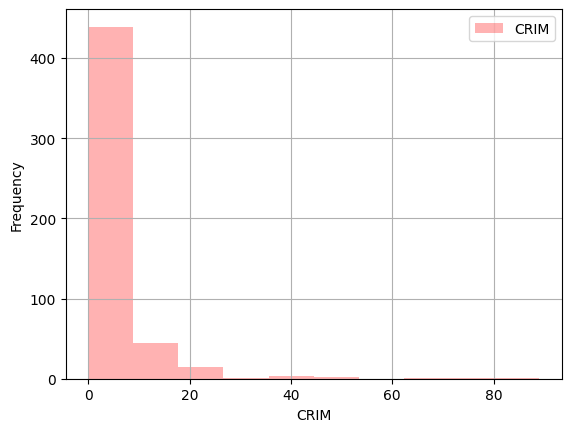

In [93]:
plt.hist(df['CRIM'], alpha=0.3, bins=10, color='red', label='CRIM')
plt.legend()
plt.grid()
plt.xlabel('CRIM')
plt.ylabel('Frequency')
plt.show()

scatter Plot

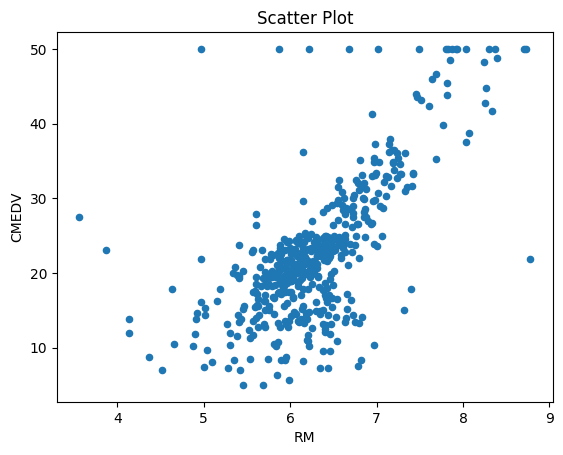

In [95]:
df.plot.scatter(x='RM', y='CMEDV', title='Scatter Plot')
plt.show()

pie chart

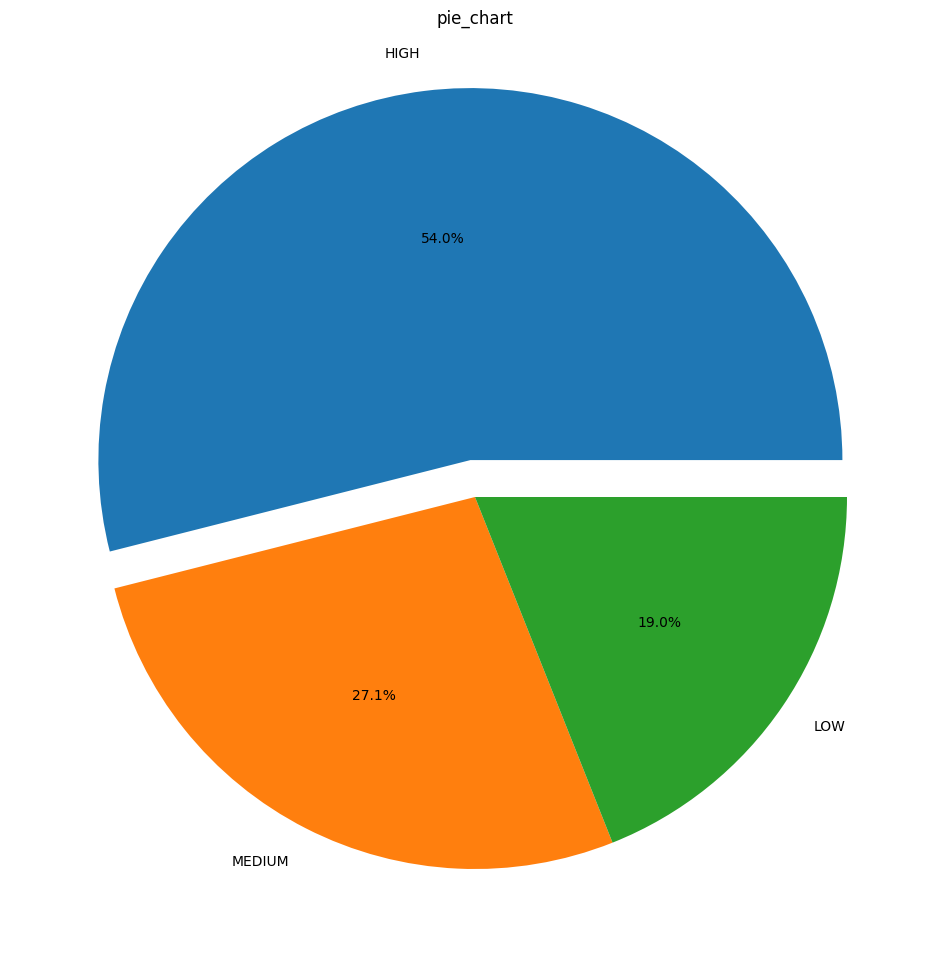

In [96]:
# %1.1f%% 최소 한자리수를 표시하고, 소수 첫번째자리까지 표시한다.
# %% : %를 표현하기 위해 쓰는 method
x = df['TAX_GRADE'].value_counts()
labels = ['HIGH','MEDIUM','LOW']

fig = plt.figure(figsize=(12,20))
ax = fig.gca()
ax.pie(x,explode = (0.1, 0, 0), labels = labels, autopct = '%1.1f%%')
plt.title('pie_chart')
plt.show()

boxplot - seaborn lib 필요

In [97]:
import seaborn as sns

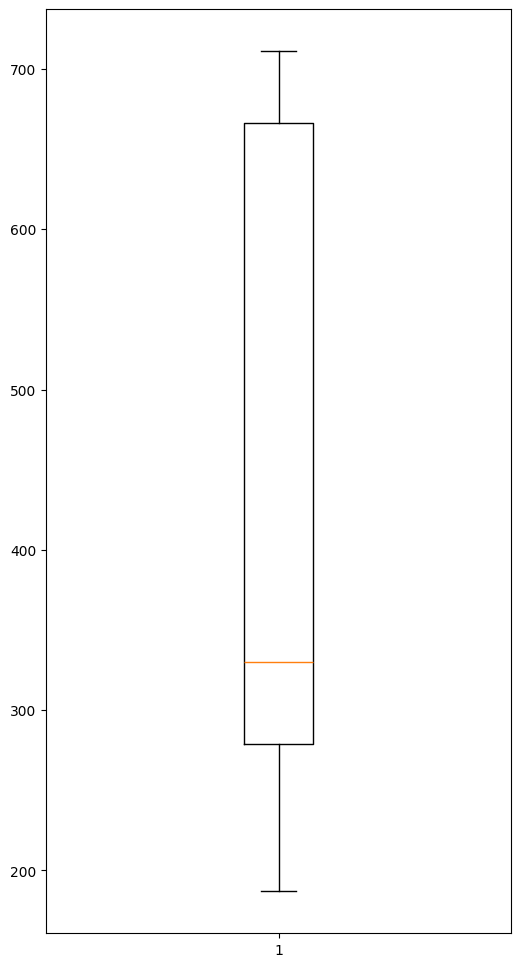

In [106]:
fig = plt.figure(figsize=(6,12))
ax = fig.gca()
ax.boxplot(df['TAX'])
plt.show()

In [101]:
print(df['TAX'].describe())

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64


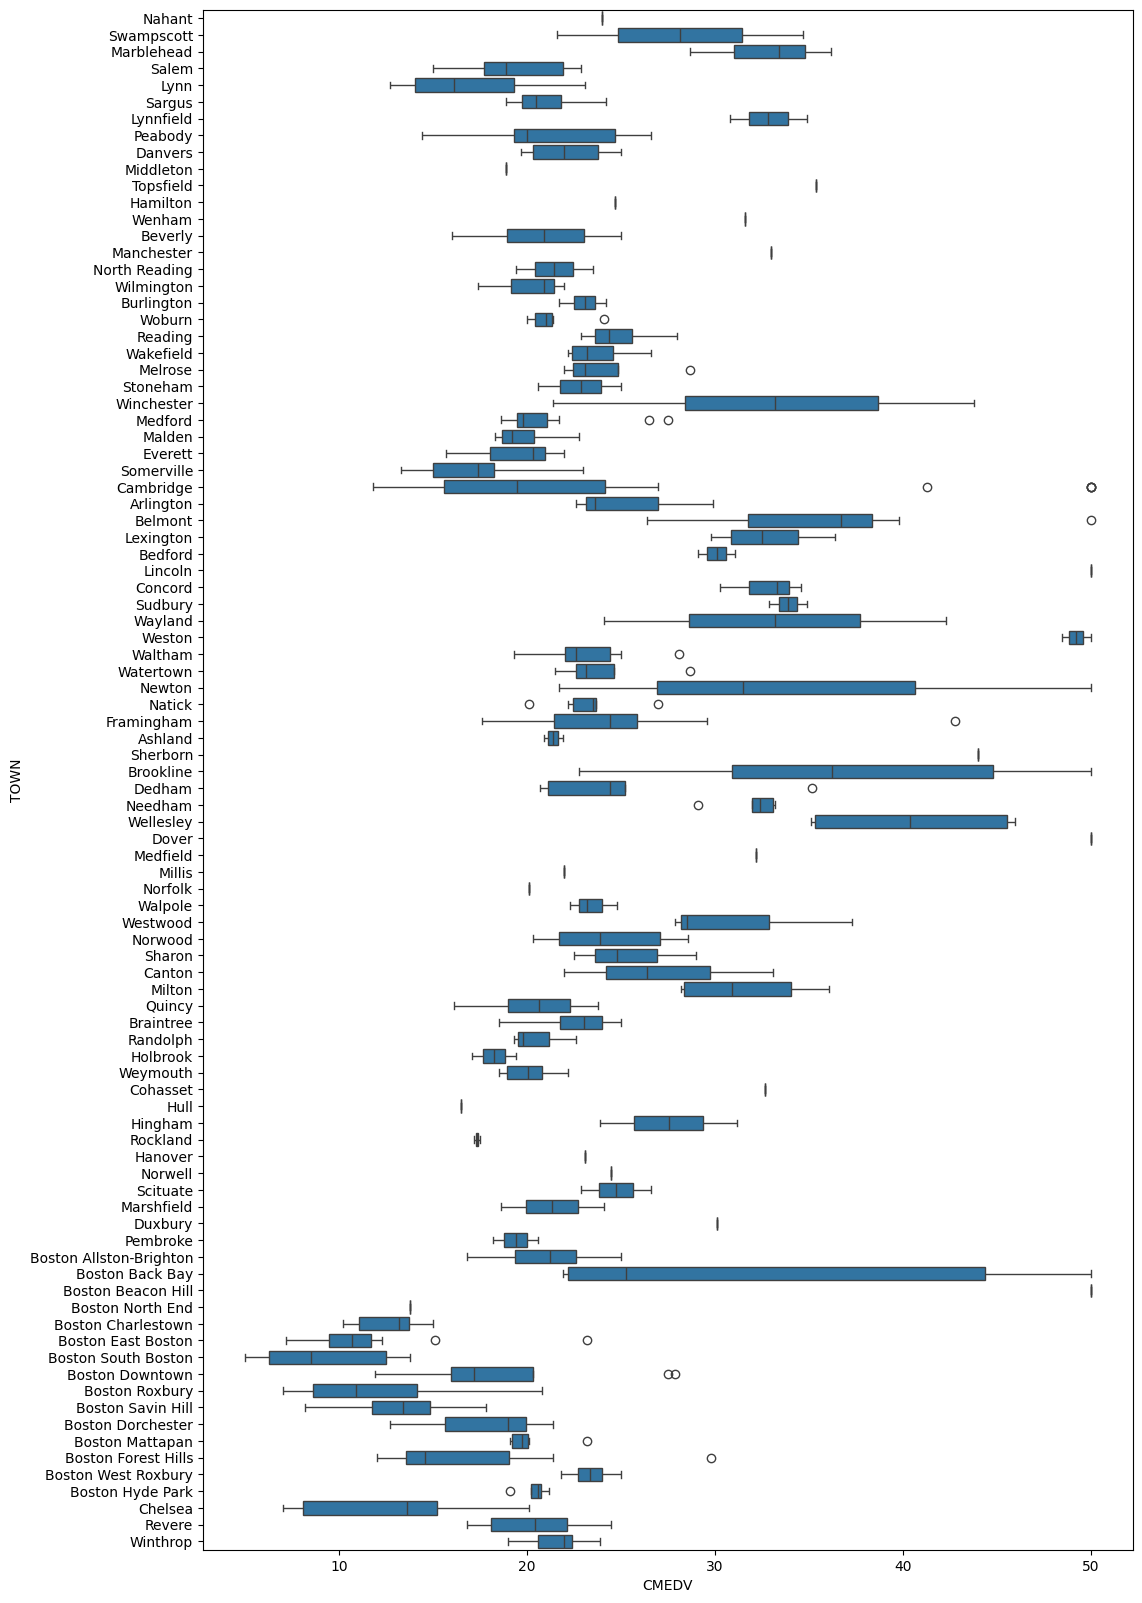

In [107]:
fig = plt.figure(figsize = (12,20))
ax=fig.gca()
sns.boxplot(x='CMEDV', y='TOWN', data=df, ax=ax)
plt.show()

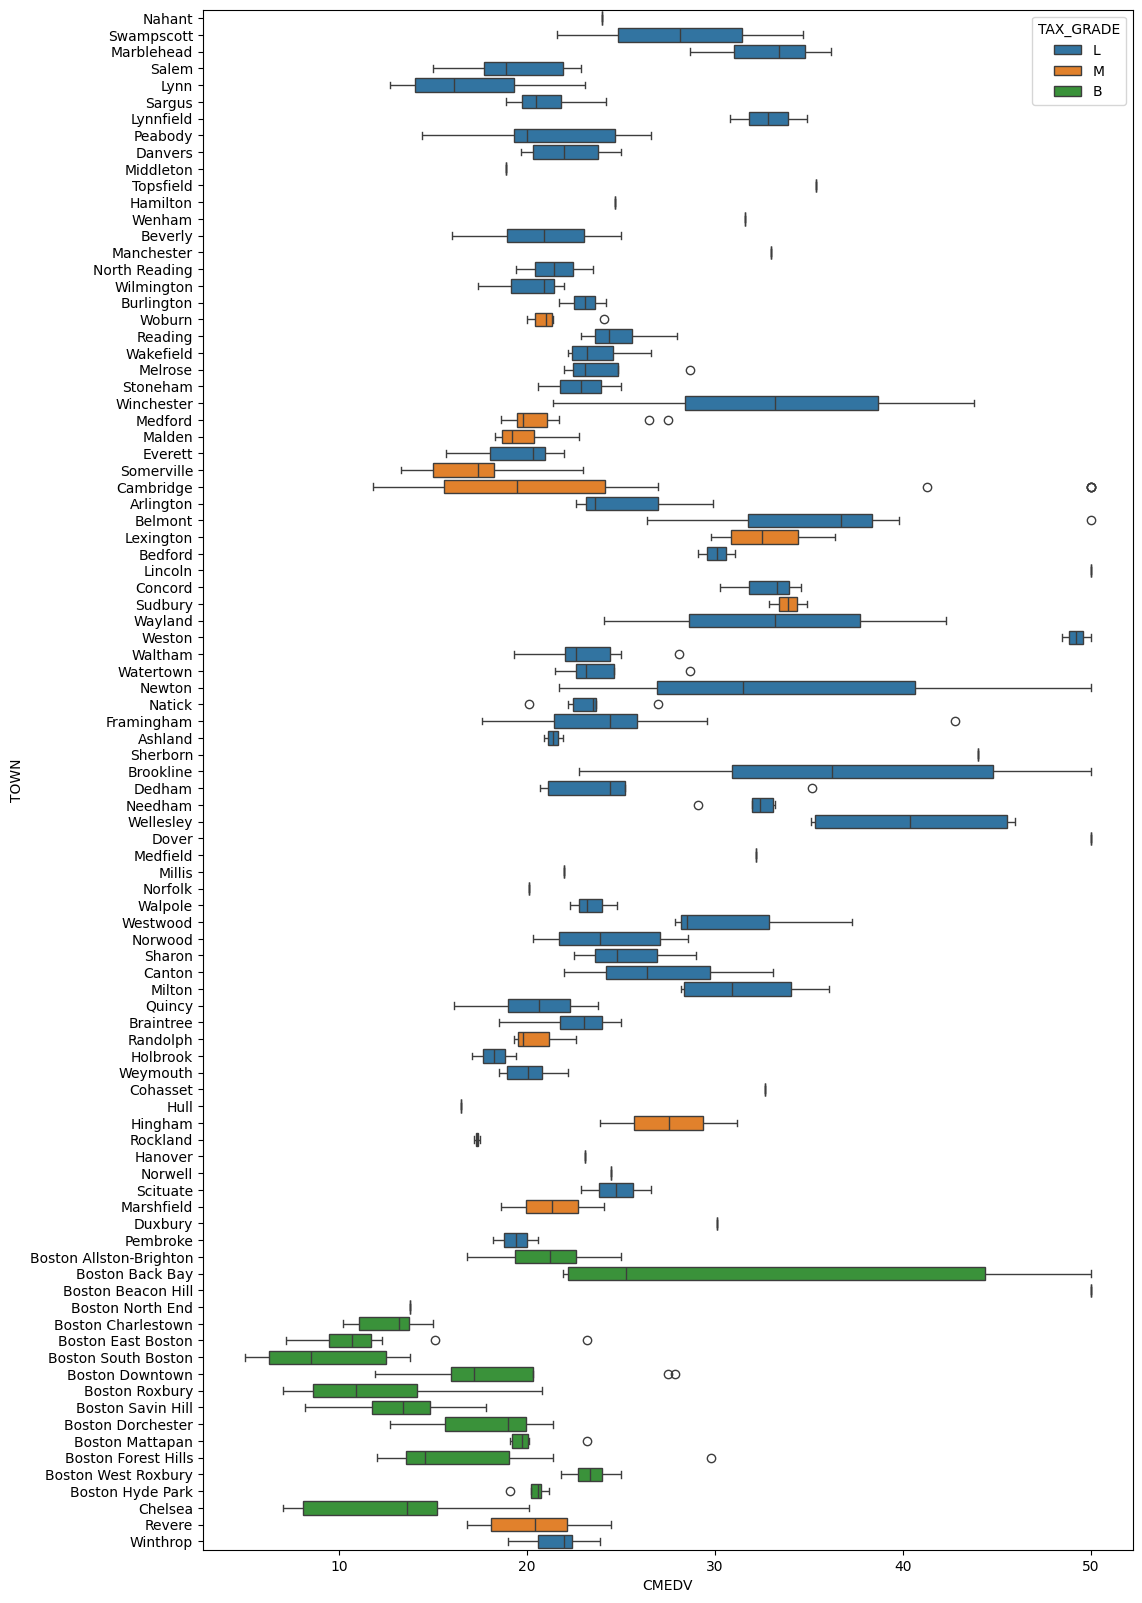

In [109]:
# hue : 해당 그룹마다 색을 다르게 함
fig = plt.figure(figsize = (12, 20))
ax = fig.gca()
sns.boxplot(x='CMEDV', y='TOWN', hue='TAX_GRADE', data=df, ax=ax)
plt.show()